In [1]:
#!/usr/bin/env RScript
###################################################################
# Description: 
# load ../processed_data/20221221_324701_cells_multi.RData
# 1. calculate pca, harmony_RNA for RNA assay
# 2. calculate lsi, harmony_peaks for peaks assay
# 3. calculate wnn, umap for WNN assay
# Author: Dian Li
# Last modified: 2023-May-19
# Last modified: 2023-June-12

In [2]:
library(Seurat)
library(Signac)
library(SeuratWrappers)
library(SeuratObject)
# library(RENIN)
library(harmony)
library(ggplot2)

Attaching SeuratObject

Attaching sp


Attaching package: ‘Signac’


The following object is masked from ‘package:Seurat’:

    FoldChange


Loading required package: Rcpp



In [8]:
plots_path = file.path("..", "..","plots", "wnn")
dir.create(plots_path, showWarnings = FALSE, recursive = T)

In [9]:
processed_data_dir = file.path("..", "..","processed_data", "wnn")
dir.create(processed_data_dir, showWarnings = FALSE, recursive = T)

### load novaseq object

In [10]:
# step 1. load novaseq.wnn object
Sys.time()
load(file = "../../processed_data/20221221_324701_cells_multi.RData")
novaseq
Sys.time()

[1] "2023-06-27 23:38:16 CDT"

An object of class Seurat 
237522 features across 324701 samples within 2 assays 
Active assay: peaks (189184 features, 189184 variable features)
 1 other assay present: RNA

[1] "2023-06-27 23:40:45 CDT"

### copy novaseq to novaseq.wnn

In [11]:
novaseq.wnn = novaseq

### replace top features calculated by "/home/data/hli/SHARE_analysis1/h5ad_file/20221123_RNA_446267cells_raw.h5ad"

In [12]:
DefaultAssay(novaseq.wnn)  <- "RNA"

In [13]:
df_highly_variable = read.csv("../../processed_data/h5ad_to_rdata/20221123_RNA_446267cells_highly_variable.csv", sep = "\t")

In [14]:
VariableFeatures(novaseq.wnn) = df_highly_variable$gene

In [15]:
head(VariableFeatures(novaseq.wnn))
length(VariableFeatures(novaseq.wnn))

[1] "A1CF"        "A2M"         "AAAS"        "AADACL2-AS1" "AAMP"       
[6] "AARS2"

[1] 5038

### set seed

In [16]:
print(Sys.time())
print("step . set.seed(1234)")

set.seed(1234)

[1] "2023-06-27 23:40:45 CDT"
[1] "step . set.seed(1234)"


### rerun RNA part until harmony except for findVariableFeatures

In [17]:
Sys.time()
novaseq.wnn <- NormalizeData(novaseq.wnn, 
                             normalization.method = "LogNormalize",
                             scale.factor = 1e4)
Sys.time()

[1] "2023-06-27 23:40:45 CDT"

[1] "2023-06-27 23:41:14 CDT"

In [19]:
Sys.time()
novaseq.wnn <- ScaleData(novaseq.wnn, vars.to.regress = c('percent.mt', 'nCount_RNA', 'nFeature_RNA'))
Sys.time()

[1] "2023-06-27 23:51:15 CDT"

Regressing out percent.mt, nCount_RNA, nFeature_RNA

Centering and scaling data matrix



[1] "2023-06-28 00:44:58 CDT"

In [20]:
Sys.time()
novaseq.wnn <- RunPCA(novaseq.wnn, assay = "RNA", verbose = TRUE)
Sys.time()

[1] "2023-06-28 00:44:58 CDT"

PC_ 1 
Positive:  LRP2, CUBN, ACSM2A, ACSM2B, SLC17A1, SLC13A3, SLC5A12, SLC4A4, TINAG, PAH 
	   ALDOB, PTPRD, AFM, ENSG00000248373, ANPEP, SLC13A1, RHOBTB1, TRPM3, SLC22A6, SLC16A9 
	   HNF4A, GLYAT, SORCS1, ACSF2, GLIS1, NCKAP5, ZEB2, ANKS1B, FTCD, SLC17A4 
Negative:  MECOM, SLC12A1, PDE1A, CLCNKA, CASR, ESRRB, KAZN, SLC4A7, PLCB1, UMOD 
	   PFKFB3, CYFIP2, RANBP3L, PRDM16, EGF, KCNIP4, ERBB4, CA12, MAL, ENSG00000236283 
	   LINC01606, SORL1, EHF, ADGRF1, SLC38A1, RP1, TFCP2L1, FMN1, MPPED2, SLCO3A1 
PC_ 2 
Positive:  COL3A1, MEIS2, A2M, COL1A2, CARMN, DCN, SYNPO2, MOXD1, LDB2, MEIS1 
	   LTBP1, CDH11, FBXL7, ADH1B, ITGA8, HPSE2, ITGA1, VCAN, C7, GNA14 
	   CA8, COL1A1, COL6A3, MGP, CACNA1C, CALD1, RBMS3, ACTN1, PDLIM3, IGFBP5 
Negative:  LRP2, ACSM2A, ACSM2B, CUBN, SLC17A1, SLC4A4, SLC5A12, SLC13A3, TINAG, PAH 
	   ENSG00000248373, RAB11FIP3, AFM, ALDOB, ANPEP, TRPM3, KCNJ15, ANK2, SLC13A1, PCK1 
	   SLC22A6, SLC16A9, GLYAT, HNF4A, NCKAP5, TRABD2B, ACSF2, FTCD, SLC17A4, PLG 
PC_ 3 


[1] "2023-06-28 00:58:37 CDT"

In [21]:
Sys.time()
novaseq.wnn <- RunHarmony(
  object = novaseq.wnn,
  group.by.vars = 'atac_prep_date',
  reduction = 'pca',
  assay.use = 'RNA',
  project.dim = FALSE,
  reduction.save = 'harmony_RNA'
)
Sys.time()

[1] "2023-06-28 00:58:37 CDT"

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations



[1] "2023-06-28 01:13:15 CDT"

### rerun ATAC part until harmony

In [22]:
print(Sys.time())
print("step . set.seed(1234)")

set.seed(1234)

[1] "2023-06-28 01:13:15 CDT"
[1] "step . set.seed(1234)"


In [23]:
DefaultAssay(novaseq.wnn) <- "peaks"

In [24]:
Sys.time()
novaseq.wnn <- RunTFIDF(novaseq.wnn, assay = "peaks")
Sys.time()

[1] "2023-06-28 01:13:15 CDT"

Performing TF-IDF normalization



[1] "2023-06-28 01:14:38 CDT"

In [25]:
Sys.time()
novaseq.wnn <- FindTopFeatures(novaseq.wnn, min.cutoff = 'q0', assay = "peaks")
novaseq.wnn
Sys.time()

[1] "2023-06-28 01:14:38 CDT"

An object of class Seurat 
237522 features across 324701 samples within 2 assays 
Active assay: peaks (189184 features, 189184 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, harmony_RNA

[1] "2023-06-28 01:15:27 CDT"

In [26]:
Sys.time()
novaseq.wnn <- RunSVD(novaseq.wnn, assay = "peaks")
novaseq.wnn
Sys.time()

[1] "2023-06-28 01:15:27 CDT"

Running SVD

Scaling cell embeddings



An object of class Seurat 
237522 features across 324701 samples within 2 assays 
Active assay: peaks (189184 features, 189184 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony_RNA, lsi

[1] "2023-06-28 01:58:32 CDT"

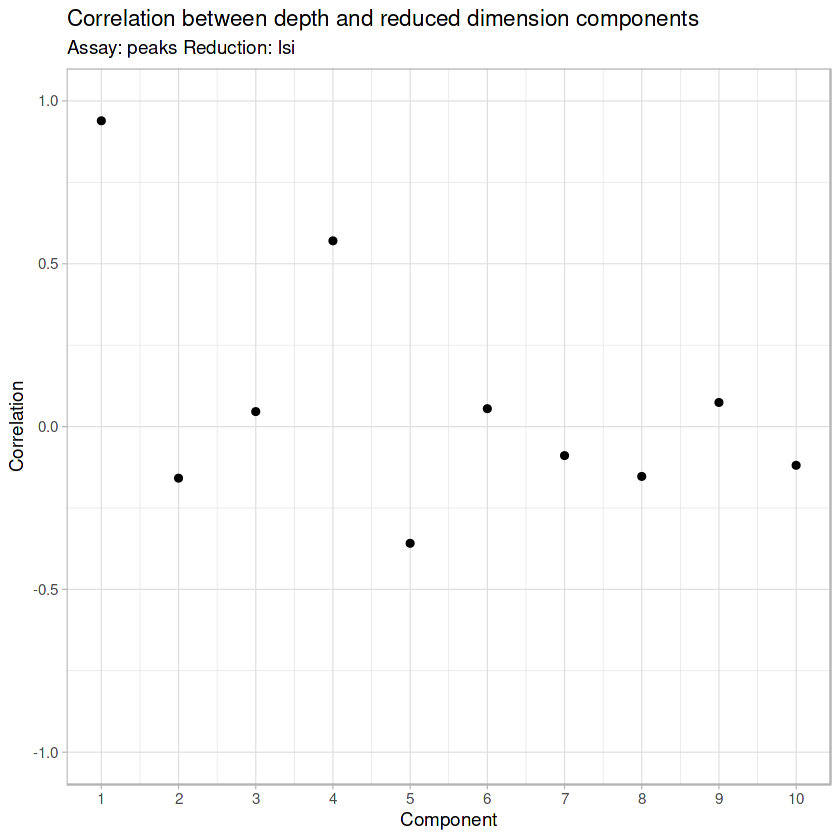

In [27]:
DepthCor(novaseq.wnn, assay = "peaks")

In [28]:
Sys.time()

novaseq.wnn <- RunHarmony(
  object = novaseq.wnn,
  group.by.vars = 'atac_prep_date',
  reduction = 'lsi',
  assay.use = 'peaks',
  project.dim = FALSE,
  reduction.save = 'harmony_peaks'
)

Sys.time()

[1] "2023-06-28 01:58:33 CDT"

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 16235050)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony converged after 9 iterations



[1] "2023-06-28 02:34:12 CDT"

In [29]:
Sys.time()

novaseq.wnn <- RunUMAP(object = novaseq.wnn, 
                         assay = "peaks",
                     reduction = "harmony_peaks", 
                     reduction.name = "umap.peaks", 
                     reduction.key = "peaksUMAP_",
                     dims = 2:30,
                     min.dist = 0.1,
                     n.neighbors = 50, 
                     n.components = 2,
                     spread = 1)

Sys.time()

[1] "2023-06-28 02:34:12 CDT"

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
02:34:12 UMAP embedding parameters a = 1.577 b = 0.8951

02:34:13 Read 324701 rows and found 29 numeric columns

02:34:13 Using Annoy for neighbor search, n_neighbors = 50

02:34:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

02:34:55 Writing NN index file to temp file /tmp/RtmpPVCyCS/file9b2116fb17aa9

02:34:55 Searching Annoy index using 1 thread, search_k = 5000

02:39:45 Annoy recall = 100%

02:39:47 Commencing smooth kNN distance calibration using 1 thread

02:40:31 Initializing 

[1] "2023-06-28 02:45:49 CDT"

## run WNN

### FindMultiModalNeighbors

In [30]:
Sys.time()
novaseq.wnn <- FindMultiModalNeighbors(novaseq.wnn, 
                                       reduction.list = list("harmony_RNA", "harmony_peaks"), 
                                       dims.list = list(1:50, 1:50), 
                                       k.nn = 20,
                                       verbose = TRUE)
Sys.time()

[1] "2023-06-28 02:45:49 CDT"

Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph



[1] "2023-06-28 03:22:55 CDT"

### RunUMAP

In [31]:
print(Sys.time())
print("step . WNN RunUMAP")

novaseq.wnn <- RunUMAP(object = novaseq.wnn, 
                       nn.name = "weighted.nn", 
                       reduction.name = "WNN.UMAP", 
                       reduction.key = "wnnUMAP_",
                       min.dist = 0.1,
                       n.neighbors = 50
                      )

Sys.time()

[1] "2023-06-28 03:22:55 CDT"
[1] "step . WNN RunUMAP"


03:22:55 UMAP embedding parameters a = 1.577 b = 0.8951

03:22:59 Commencing smooth kNN distance calibration using 1 thread

03:23:17 Initializing from normalized Laplacian + noise

03:23:40 Commencing optimization for 200 epochs, with 11480476 positive edges

03:27:18 Optimization finished



[1] "2023-06-28 03:27:18 CDT"

In [32]:
library(repr)
options(repr.plot.width = 12, repr.plot.height = 10)

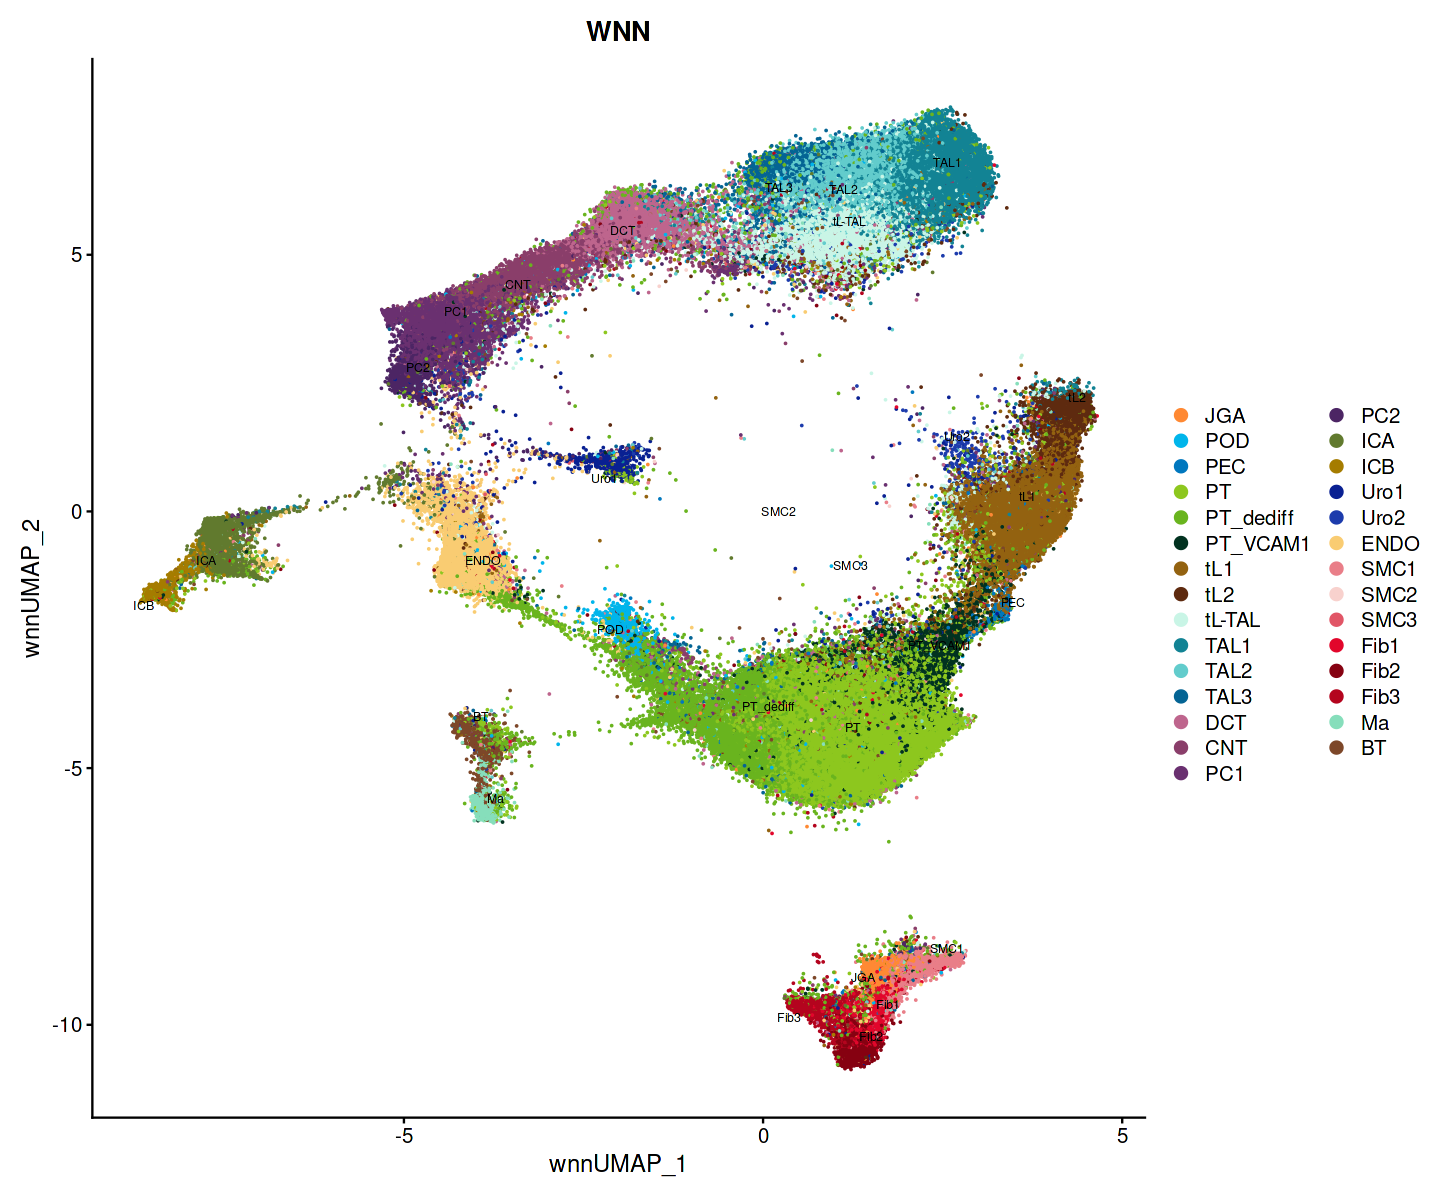

In [33]:
DimPlot(novaseq.wnn, reduction = "WNN.UMAP", group.by = "celltype5_rna", cols = palette.novaseq.rna, label = TRUE, label.size = 2.5, repel = TRUE, raster = FALSE) + ggtitle("WNN")

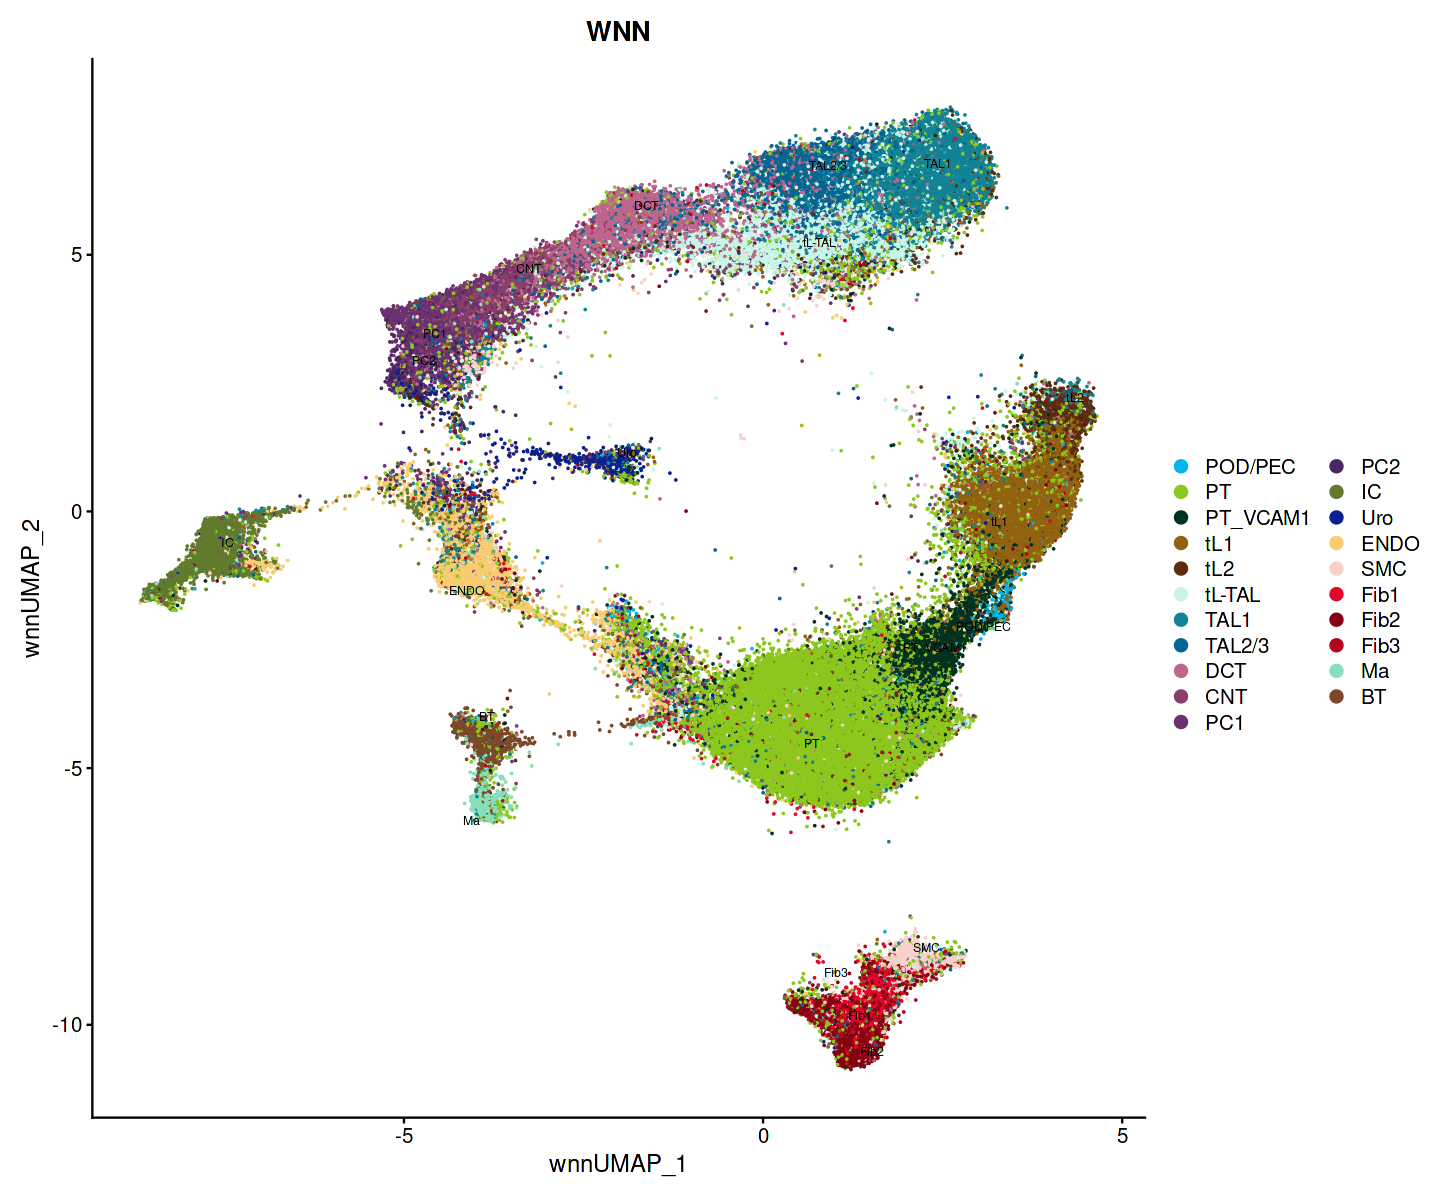

In [34]:
DimPlot(novaseq.wnn, reduction = "WNN.UMAP", group.by = "celltype_atac5", cols = palette.novaseq, label = TRUE, label.size = 2.5, repel = TRUE, raster = FALSE) + ggtitle("WNN")

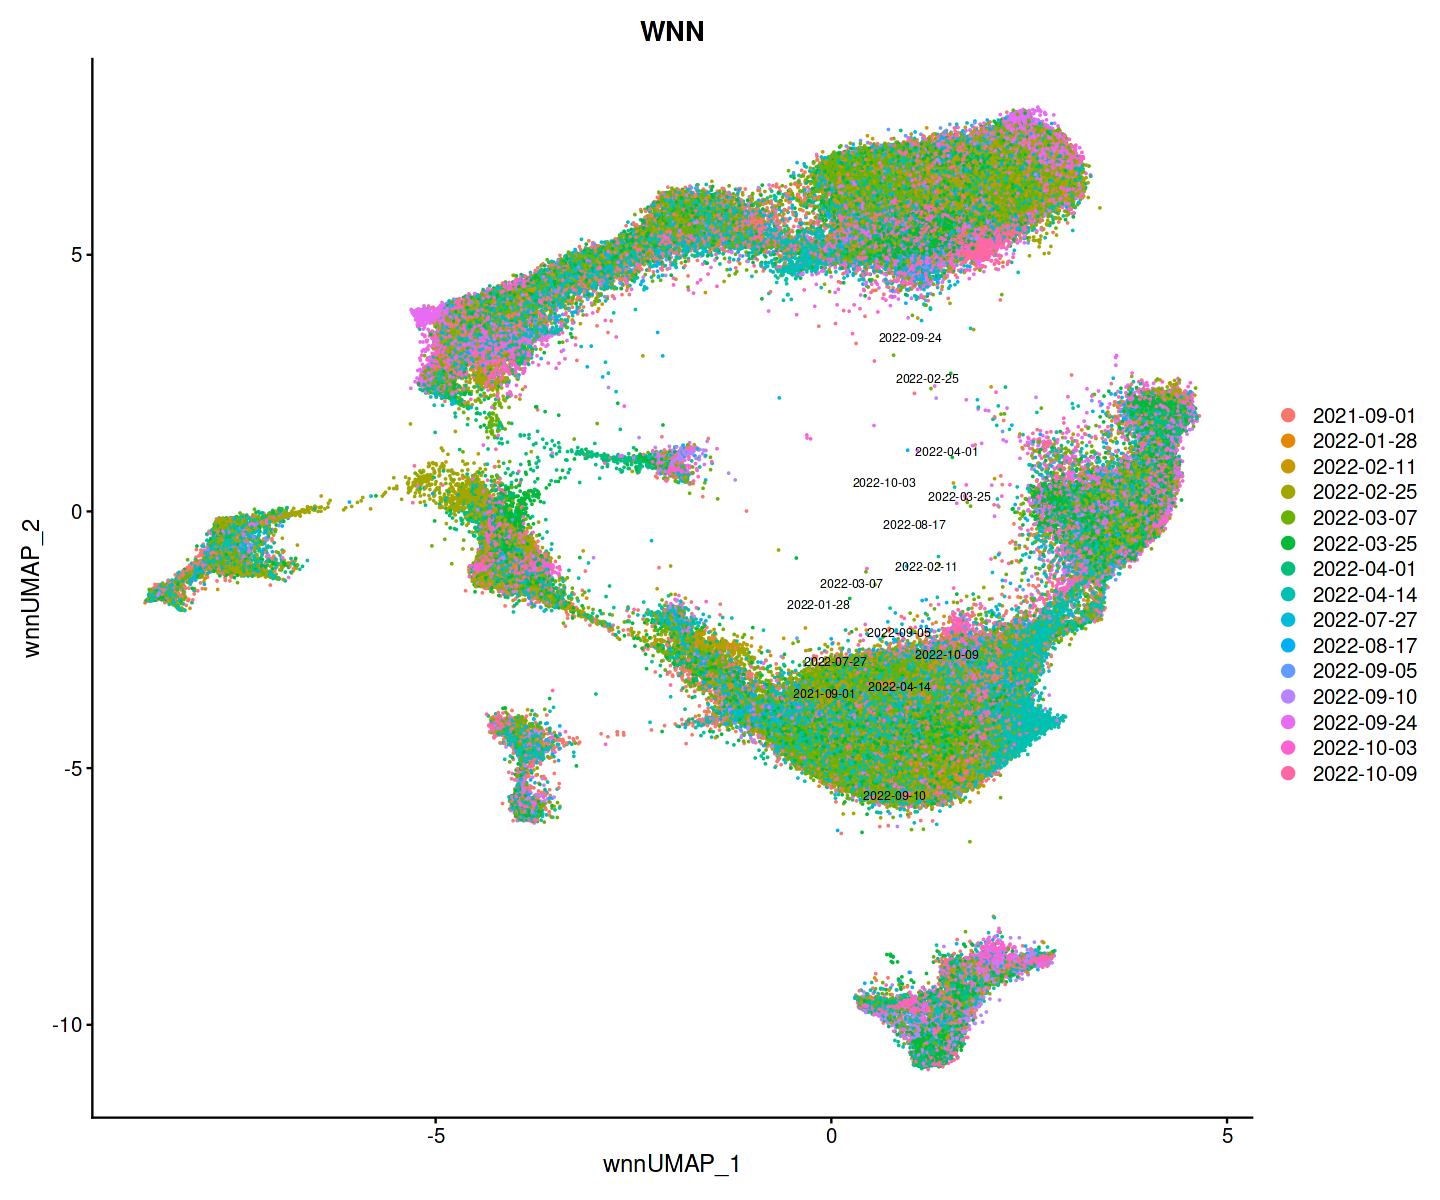

In [35]:
DimPlot(novaseq.wnn, reduction = "WNN.UMAP", group.by = "atac_prep_date", label = TRUE, label.size = 2.5, repel = TRUE, raster = FALSE) + ggtitle("WNN")

In [36]:
ls()

[1] "df_highly_variable"               "level.novaseq"                   
 [3] "level.novaseq.renal_region_new"   "level.novaseq.rna"               
 [5] "novaseq"                          "novaseq.wnn"                     
 [7] "palette.novaseq"                  "palette.novaseq.renal_region_new"
 [9] "palette.novaseq.rna"              "plots_path"                      
[11] "processed_data_dir"

In [37]:
###################################################################
###################################################################
# step . save novaseq.wnn object
print(Sys.time())
print("step . save novaseq.wnn object after running FindMultiModalNeighbors")
save(list = c("novaseq.wnn",
             'level.novaseq.rna', 'palette.novaseq.rna',
             'level.novaseq', 'palette.novaseq',
             'level.novaseq.renal_region_new', 'palette.novaseq.renal_region_new'), 
     file = file.path(processed_data_dir, "20221221_324701_cells_wnn.RData"), compress = T)
Sys.time()

[1] "2023-06-28 03:27:46 CDT"
[1] "step . save novaseq.wnn object after running FindMultiModalNeighbors"


[1] "2023-06-28 04:02:53 CDT"

In [ ]:
novaseq.wnn

In [38]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] repr_1.1.6           ggplot2_3.4.1        harmony_0.1.0       
[4] Rcpp_1.0.10          SeuratWrappers_0.3.0 Signac_1.2.1        
[7] sp_1.5-0             SeuratObject_4.1.0   Seurat_4.1.1        

loaded via a namespace (and not attached):
  [1] uuid_1.1-0       